# Task 1
## Standard and Poor's (S&P) 500 index prediction
### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn import metrics

### Read data into memory

In [12]:
data = pd.read_csv('sp500.csv')
data = data.drop(['Unnamed: 0'], axis = 1)

### Correlate data

In [3]:
correlation_matrix = data.corr()

### 1- Find Highest correlation
#### Method 1: Generate Heatmap
This is to get a visual representation for how the data is correlated.

This method will prove to be inefficient for data sets with a large number of headers. In this case, there

#### Method 2: Search Correlation Matrix For Desired Values
This method will return the column names that have the highest correlation with SP500.

For the sake of this task, we will only get the correlations between 1.0 and 0.95 as well as between -0.95 and -1.0.

METHOD # 1 
 HEATMAP


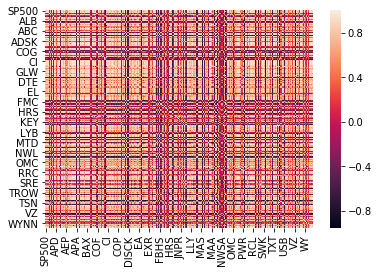

METHOD # 2 
 SEARCH
  71 columns found!


In [4]:
print('METHOD # 1 \n HEATMAP')
sns.heatmap(correlation_matrix)
plt.show()

print('METHOD # 2 \n SEARCH')
sp_correlations = np.array(correlation_matrix[['SP500']])[1:]
correlation_indices = np.union1d(np.where(sp_correlations >= 0.95), np.where(sp_correlations <= -0.95)) + 1
print("  " + str(correlation_indices.size - 1) + " columns found!")

### 2-Extract the Desired Dataset
Get the desired data from the larger dataset, and split it into three smaller sets. One for training, one for testing and one for validation with the ratios 8:1:1 repectively.

Normalize the data using sklearns's scale function.

In [5]:
desired_data = data.iloc[:, correlation_indices]

input_set  = preprocessing.scale(desired_data)
output_set = preprocessing.scale(data[['SP500']])

train_ratio = 0.8
test_ratio  = 0.2
valid_ratio = 0.1 # Will be used in the MLPClassifier to take 10% of the training data as validation

training_input,testing_input,training_target,testing_target = train_test_split(input_set,output_set,
                                                                               test_size=test_ratio,
                                                                               random_state=1)
print(training_input.shape,training_target.shape)


(1008, 72) (1008, 1)


### Create the Linear regressor
Two multilayer perceptrons. One using a stochastic gradient descent optimizer, and the other using an adam optimizer.

Other than the optimizer, all other parameters will remain consistent for both models.

#### Scoring Metric Used:
*The mean squared error will be used as a scoring metric. The lower the error, the better the optimizer!*

#### Regularization Technique Used:
*Early stopping and L2 regularization were used to avoid overfitting*

In [6]:
hidden_layer        = (512, 512, 512) # Hidden layers and nodes, per layer
regularization_rate = 0.00001         # Rate for L2 regularization
learning_rate_start = 0.001            # Initial learning rate
learning_rate_mode  = 'adaptive'      # Mode for changing learning rate
batch_size          = 32             # Size of batch for one update
tolerance           = 1e-6            # Tolerance level for regressor
max_iteration       = 1000            # Maximum number of iterations before stopping
no_change_tolerance = 12              # Stop if no significant change happens in this number of iterations

# n_iter_no_change=10

model_adm = MLPRegressor(hidden_layer_sizes=hidden_layer, solver='adam', alpha=regularization_rate,
                          batch_size=batch_size, learning_rate=learning_rate_mode,
                          learning_rate_init=learning_rate_start, max_iter=max_iteration, tol=tolerance,
                          verbose=True, early_stopping=True, validation_fraction=valid_ratio,
                          n_iter_no_change=no_change_tolerance)
model_sgd = MLPRegressor(hidden_layer_sizes=hidden_layer, solver='sgd', alpha=regularization_rate,
                          batch_size=batch_size, learning_rate=learning_rate_mode,
                          learning_rate_init=learning_rate_start, max_iter=max_iteration, tol=tolerance,
                          verbose=True, early_stopping=True, validation_fraction=valid_ratio,
                          n_iter_no_change=no_change_tolerance)

### Give The Models The Training Data And Fit Them!

#### First, The SGD Optimizer

In [8]:
model_sgd.fit(training_input, training_target.ravel())

Iteration 1, loss = 0.10435400
Validation score: 0.976612
Iteration 2, loss = 0.00751638
Validation score: 0.989361
Iteration 3, loss = 0.00502688
Validation score: 0.991215
Iteration 4, loss = 0.00410577
Validation score: 0.992266
Iteration 5, loss = 0.00353447
Validation score: 0.993049
Iteration 6, loss = 0.00307229
Validation score: 0.993808
Iteration 7, loss = 0.00279424
Validation score: 0.994203
Iteration 8, loss = 0.00248799
Validation score: 0.994158
Iteration 9, loss = 0.00230663
Validation score: 0.994430
Iteration 10, loss = 0.00215307
Validation score: 0.995184
Iteration 11, loss = 0.00198706
Validation score: 0.995524
Iteration 12, loss = 0.00189762
Validation score: 0.995334
Iteration 13, loss = 0.00181400
Validation score: 0.995632
Iteration 14, loss = 0.00172798
Validation score: 0.995910
Iteration 15, loss = 0.00165634
Validation score: 0.995916
Iteration 16, loss = 0.00159168
Validation score: 0.996207
Iteration 17, loss = 0.00155703
Validation score: 0.996309
Iterat

Iteration 140, loss = 0.00057100
Validation score: 0.998744
Iteration 141, loss = 0.00057028
Validation score: 0.998713
Iteration 142, loss = 0.00057624
Validation score: 0.998733
Iteration 143, loss = 0.00056822
Validation score: 0.998739
Iteration 144, loss = 0.00057172
Validation score: 0.998676
Iteration 145, loss = 0.00056380
Validation score: 0.998727
Iteration 146, loss = 0.00056107
Validation score: 0.998754
Iteration 147, loss = 0.00055928
Validation score: 0.998789
Iteration 148, loss = 0.00055506
Validation score: 0.998738
Iteration 149, loss = 0.00055448
Validation score: 0.998805
Iteration 150, loss = 0.00055650
Validation score: 0.998828
Iteration 151, loss = 0.00055362
Validation score: 0.998817
Iteration 152, loss = 0.00055789
Validation score: 0.998789
Iteration 153, loss = 0.00055092
Validation score: 0.998842
Iteration 154, loss = 0.00054764
Validation score: 0.998816
Iteration 155, loss = 0.00054681
Validation score: 0.998797
Iteration 156, loss = 0.00054507
Validat

Iteration 275, loss = 0.00044172
Validation score: 0.999136
Iteration 276, loss = 0.00044151
Validation score: 0.999147
Iteration 277, loss = 0.00044120
Validation score: 0.999143
Iteration 278, loss = 0.00044134
Validation score: 0.999145
Iteration 279, loss = 0.00044070
Validation score: 0.999143
Iteration 280, loss = 0.00044183
Validation score: 0.999140
Iteration 281, loss = 0.00044051
Validation score: 0.999149
Iteration 282, loss = 0.00044142
Validation score: 0.999152
Iteration 283, loss = 0.00044076
Validation score: 0.999145
Iteration 284, loss = 0.00044077
Validation score: 0.999150
Iteration 285, loss = 0.00044079
Validation score: 0.999149
Iteration 286, loss = 0.00044059
Validation score: 0.999141
Iteration 287, loss = 0.00044058
Validation score: 0.999150
Iteration 288, loss = 0.00044031
Validation score: 0.999150
Iteration 289, loss = 0.00044018
Validation score: 0.999144
Iteration 290, loss = 0.00043974
Validation score: 0.999147
Iteration 291, loss = 0.00043983
Validat

MLPRegressor(activation='relu', alpha=1e-05, batch_size=32, beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(512, 512, 512), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=12, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='sgd', tol=1e-06,
       validation_fraction=0.1, verbose=True, warm_start=False)

#### Then, The Adam Optimizer

In [7]:
model_adm.fit(training_input, training_target.ravel())

Iteration 1, loss = 0.05240125
Validation score: 0.995520
Iteration 2, loss = 0.00320341
Validation score: 0.997180
Iteration 3, loss = 0.00206108
Validation score: 0.998621
Iteration 4, loss = 0.00088283
Validation score: 0.998817
Iteration 5, loss = 0.00070960
Validation score: 0.998531
Iteration 6, loss = 0.00085534
Validation score: 0.999089
Iteration 7, loss = 0.00067056
Validation score: 0.997914
Iteration 8, loss = 0.00132858
Validation score: 0.993001
Iteration 9, loss = 0.00202707
Validation score: 0.995375
Iteration 10, loss = 0.00106059
Validation score: 0.998881
Iteration 11, loss = 0.00067520
Validation score: 0.999034
Iteration 12, loss = 0.00056405
Validation score: 0.997305
Iteration 13, loss = 0.00104438
Validation score: 0.998589
Iteration 14, loss = 0.00073029
Validation score: 0.998538
Iteration 15, loss = 0.00053378
Validation score: 0.999197
Iteration 16, loss = 0.00043562
Validation score: 0.999583
Iteration 17, loss = 0.00053488
Validation score: 0.998591
Iterat

MLPRegressor(activation='relu', alpha=1e-05, batch_size=32, beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(512, 512, 512), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=12, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=1e-06,
       validation_fraction=0.1, verbose=True, warm_start=False)

### Comparing Both Optimizers Through Their Mean Squared Error
- It is shown that Adam converges faster than SGD which takes more than triple the iteration count to reach the same loss.
- Using SGD we obtained slightly lower loss but the validation score for Adam Was better.
- Adam is more suitable for the task since it converges faster, also it performs better for our particular network.

In [9]:
predictions_adm = model_adm.predict(testing_input)
mse_adm = metrics.mean_squared_error(predictions_adm,testing_target)

predictions_sgd = model_sgd.predict(testing_input)
mse_sgd = metrics.mean_squared_error(predictions_sgd,testing_target)

print("Adam's Mean-Squared-Error:", mse_adm)
print("SGD's Mean-Squared-Error:", mse_sgd)

Adam's Mean-Squared-Error: 0.00043199399226643117
SGD's Mean-Squared-Error: 0.000650856717751881


### Plot of Predictions vs. Targets
points that are not well predicted may be outliers or the model did not learn a general representation that can incorporate all the data points (it must miss a few!).

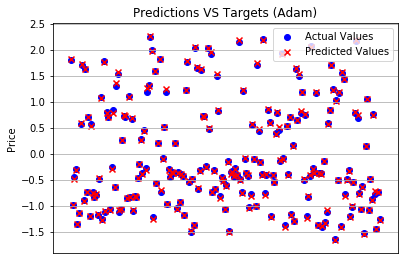

In [10]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])

START = 0
END   = 200

ax.scatter(np.arange(200), testing_target[START:END], c='b', marker='o', label='Actual Values')
ax.scatter(np.arange(200), predictions_adm[START:END], c='r', marker='x', label='Predicted Values')
ax.grid()
ax.legend(loc='best')
ax.set_ylabel('Price')
ax.set_title('Predictions VS Targets (Adam)')
ax.set_xticklabels([])
ax.set_xticks([])

plt.show()

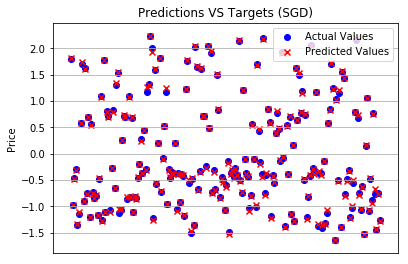

In [11]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])

ax.scatter(np.arange(200), testing_target[START:END], c='b', marker='o', label='Actual Values')
ax.scatter(np.arange(200), predictions_sgd[START:END], c='r', marker='x', label='Predicted Values')
ax.grid()
ax.legend(loc='best')
ax.set_ylabel('Price')
ax.set_title('Predictions VS Targets (SGD)')
ax.set_xticklabels([])
ax.set_xticks([])

plt.show()